<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \renewcommand{\bra}[1]{\langle #1|} $
$ \renewcommand{\ket}[1]{|#1\rangle} $
$ \renewcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \renewcommand{\dot}[2]{ #1 \cdot #2} $
$ \renewcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \renewcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \renewcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \renewcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \renewcommand{\mypar}[1]{\left( #1 \right)} $
$ \renewcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \renewcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \renewcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \renewcommand{\onehalf}{\frac{1}{2}} $
$ \renewcommand{\donehalf}{\dfrac{1}{2}} $
$ \renewcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \renewcommand{\vzero}{\myvector{1\\0}} $
$ \renewcommand{\vone}{\myvector{0\\1}} $
$ \renewcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \renewcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \renewcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \renewcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \renewcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \renewcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \renewcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \renewcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \renewcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \renewcommand{\pstate}[1]{ \lceil #1 \rfloor } $
$ \renewcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \renewcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \renewcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \renewcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \renewcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> Phase Kickback </b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>
[<img src="../qworld/images/watch_lecture.jpg" align="left">](https://youtu.be/7H7A9IRPc8s)
<br><br><br>

We observe another interesting quantum effect here.

We apply a Controlled-NOT operator, but the controller qubit will be affected!

<h3> Task 1</h3>

Create a quantum circuit with two qubits, say $ q[1] $ and $ q[0] $ in the reading order of Qiskit.

We start in quantum state $ \ket{01} $:
- set the state of $ q[1] $ to $ \ket{0} $, and
- set the state of $ q[0] $ to $ \ket{1} $.

Apply Hadamard to both qubits.

Apply CNOT operator, where the controller qubit is $ q[1] $ and the target qubit is $ q[0] $.

Apply Hadamard to both qubits.

Measure the outcomes.

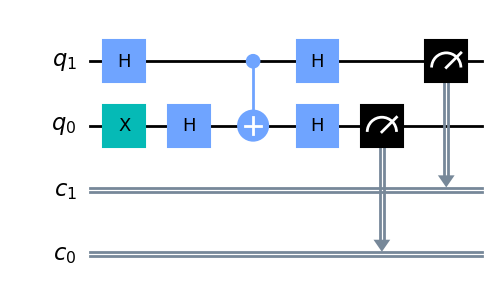

{'11': 100}


In [2]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
#
# your code is here
#
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)

# set q[0] to |1>
qc.x(q[0])

# apply Hadamard to both qubits
qc.h(q[1])
qc.h(q[0])

# apply CNOT(q[1], q[0])
qc.cx(q[1], q[0])

# apply Hadamard to both qubits
qc.h(q[1])
qc.h(q[0])

qc.measure(q, c)

display(qc.draw(output = 'mpl', reverse_bits = True))

job = execute(qc, Aer.get_backend('qasm_simulator'), shots = 100)
counts = job.result().get_counts(qc)
print(counts)

<a href="Q64_Phase_Kickback_Solutions.ipynb#task1">click for our solution</a>

<h3> The effect of CNOT </h3>

The quantum state of the up qubit before CNOT:

$$
    \ket{0} \xrightarrow{H} \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}.
$$

The quantum state of the down qubit before CNOT:

$$
    \ket{1} \xrightarrow{H} \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}.
$$

The quantum state of the composite system:

$$
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} } 
   \otimes
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

CNOT affects when the up qubit has the value 1.

Let's rewrite the composite state as below to explicitly represent the effect of CNOT.

$$
     \frac{1}{\sqrt{2}} \ket{0} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
     +
     \frac{1}{\sqrt{2}} \ket{1} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

CNOT flips the state of the down qubit.

After CNOT, we have:

$$
     \frac{1}{\sqrt{2}} \ket{0} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
     +
     \frac{1}{\sqrt{2}} \ket{1} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{1} - \frac{1}{\sqrt{2}} \ket{0}  }
$$

Remark that $\ket{0}$ and $ \ket{1} $ are swapped in the second qubit.

If we write the quantum state of the down qubit as before, the sign of $ \ket{1} $ in the up qubit should be flipped.

Thus the last equation can be equivalently written as follows:

$$
     \frac{1}{\sqrt{2}} \ket{0} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
     -
     \frac{1}{\sqrt{2}} \ket{1} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

Before CNOT operator, the sign of $ \ket{1} $ in the up qubit is positive. 
    
After CNOT operator, its sign changes to negative.

This is called <b>phase kickback</b>.

<h3> After CNOT </h3>

It is easy to see from the last expression, that the quantum states of the qubits are separable (no correlation):

$$
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} } 
   \otimes
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

If we apply Hadamard to each qubit, both qubits evolve to state $ \ket{1} $.

The final state is $ \ket{11} $.

<h3> Task 2 </h3>

Create a circuit  with 7 qubits, say $ q[6],\ldots,q[0] $ in the reading order of Qiskit.

Set the states of the top six qubits to $ \ket{0} $.

Set the state of the bottom qubit to $ \ket{1} $.

Apply Hadamard operators to all qubits.

Apply CNOT operator ($q[1]$,$q[0]$) 
<br>
Apply CNOT operator ($q[4]$,$q[0]$) 
<br>
Apply CNOT operator ($q[5]$,$q[0]$) 

Apply Hadamard operators to all qubits.

Measure all qubits. 

For each CNOT operator, is there a phase-kickback effect?

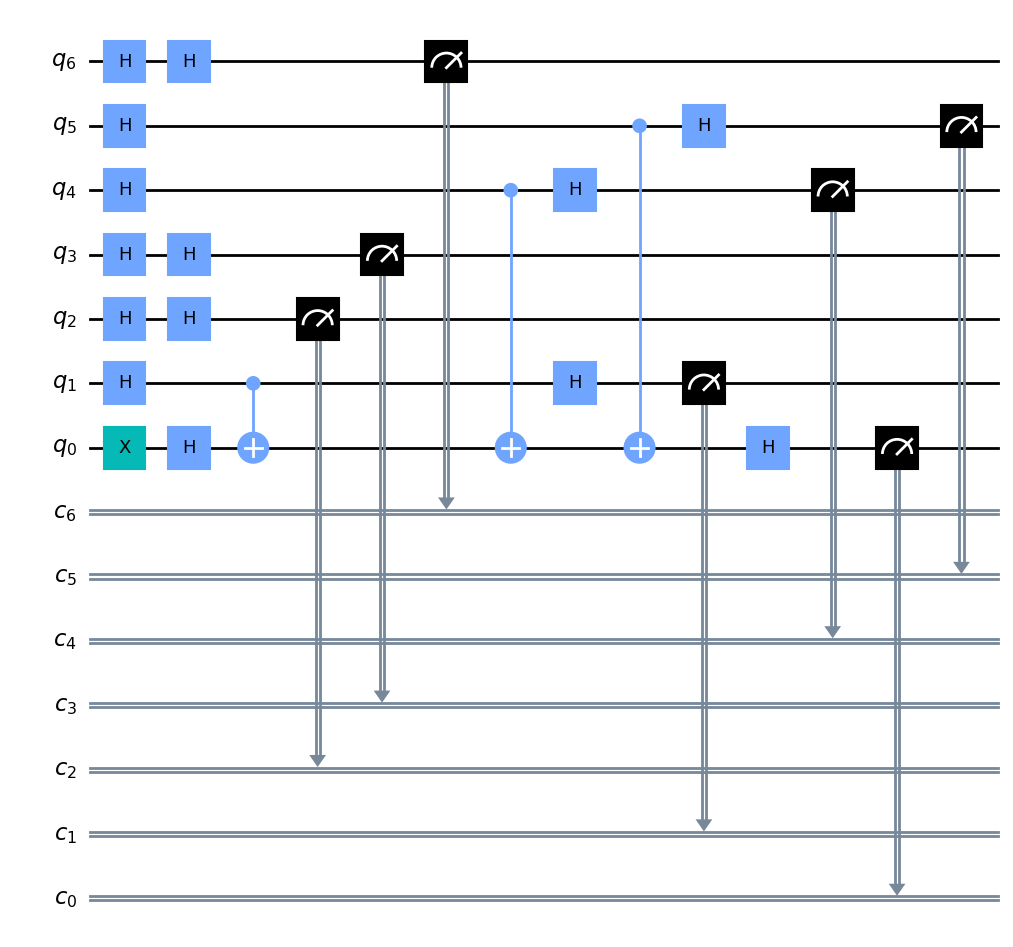

{'0110011': 100}


In [3]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
#
# your code is here
#
q = QuantumRegister(7, 'q')
c = ClassicalRegister(7, 'c')
qc = QuantumCircuit(q, c)

qc.x(q[0])  # set the state of the bottom qubit to |1>

# apply Hadamard to all qubits
for i in range(7):
    qc.h(q[i])

# apply CNOT to the following:
qc.cx(q[1], q[0])
qc.cx(q[4], q[0])
qc.cx(q[5], q[0])

# apply Hadamard to all qubits
for i in range(7):
    qc.h(q[i])

qc.measure(q, c)

display(qc.draw(output = 'mpl', reverse_bits = True))

job = execute(qc, Aer.get_backend('qasm_simulator'), shots = 100)
counts = job.result().get_counts(qc)
print(counts)

My Answer to the Question --> No phase kickback occurred in any of the CNOTs. CNOT operation is applied on q0 (i.e., q0 state is flipped) if the control qubit (q1, q4, q5) are in state |1>. Given that all control bits are in state |0>, the state of q0 is never flipped, so no phase kickback occurred

<a href="Q64_Phase_Kickback_Solutions.ipynb#task2">click for our solution</a>